In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/home/harsh/Downloads/census - census.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# No Missing Values

# EDA & Visualization

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

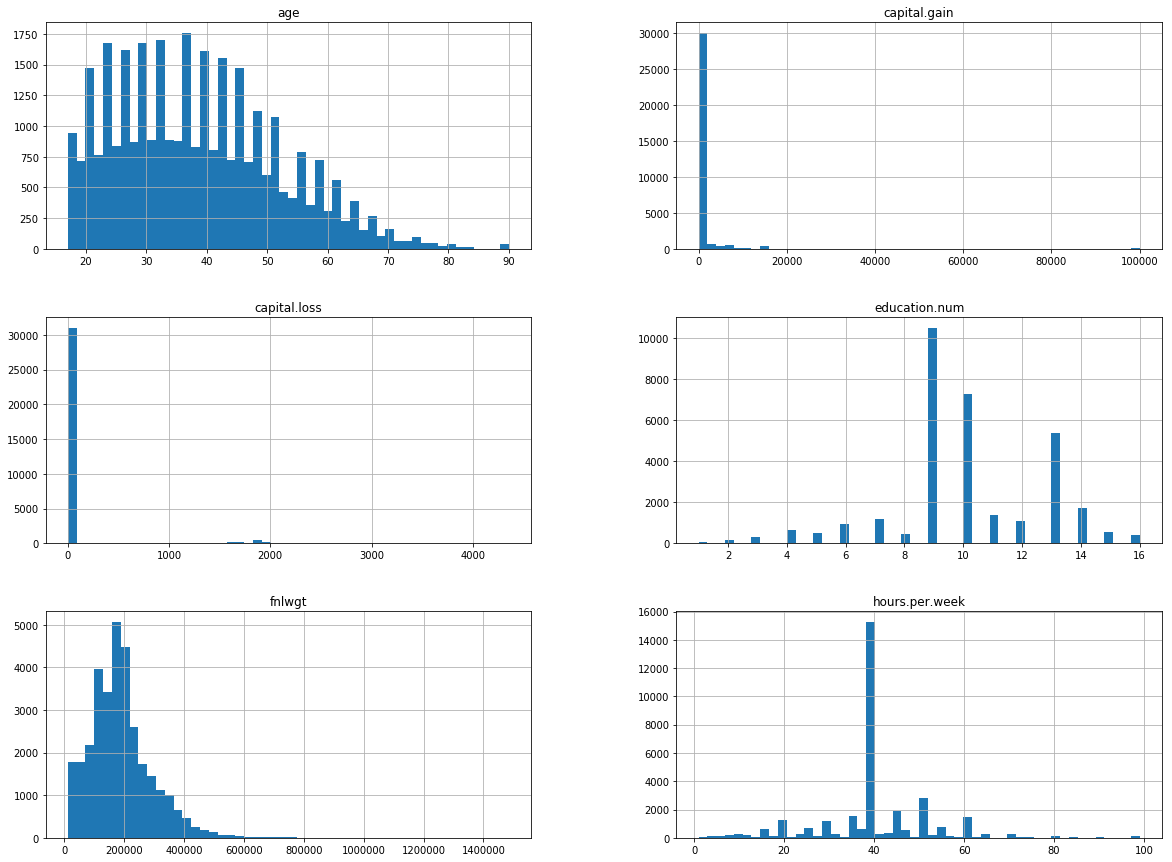

In [8]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
num=["age","education.num","capital.gain","capital.loss","hours.per.week"]

In [10]:
corr_matrix=df[num]

In [11]:
import seaborn as sns

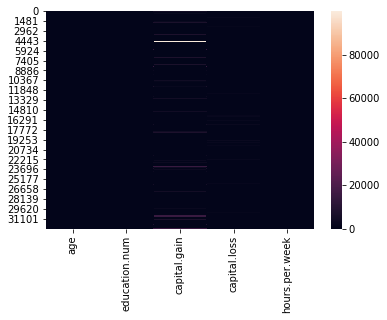

In [12]:
sns.heatmap(corr_matrix)

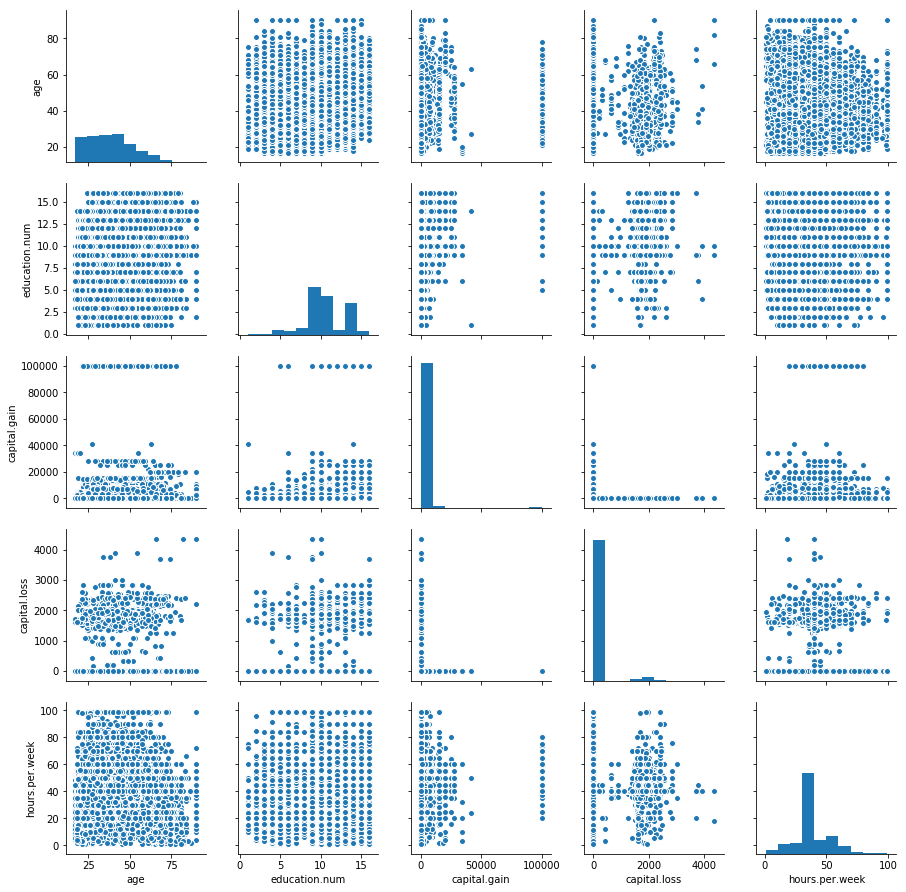

In [13]:
sns.pairplot(df[num])

/home/harsh/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


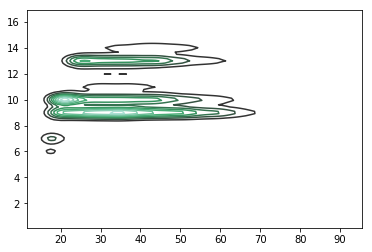

In [14]:
sns.kdeplot(df[num])

/home/harsh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/harsh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


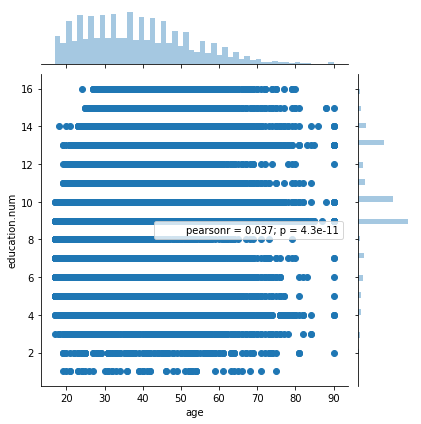

In [15]:
sns.jointplot(x="age",y="education.num",data=df)

/home/harsh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/harsh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


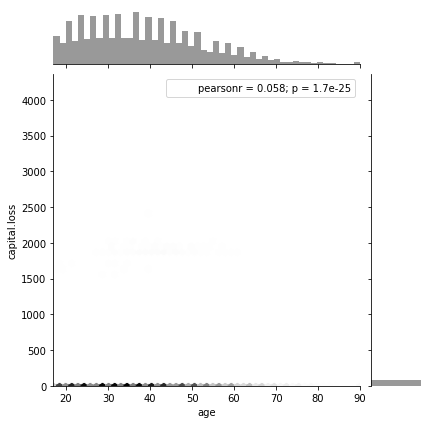

In [16]:
sns.jointplot(x=df.age,y=df["capital.loss"],kind="hex",color="k")

In [17]:
from pandas.tools.plotting import scatter_matrix

/home/harsh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb583b6d30>,
      dtype=object)

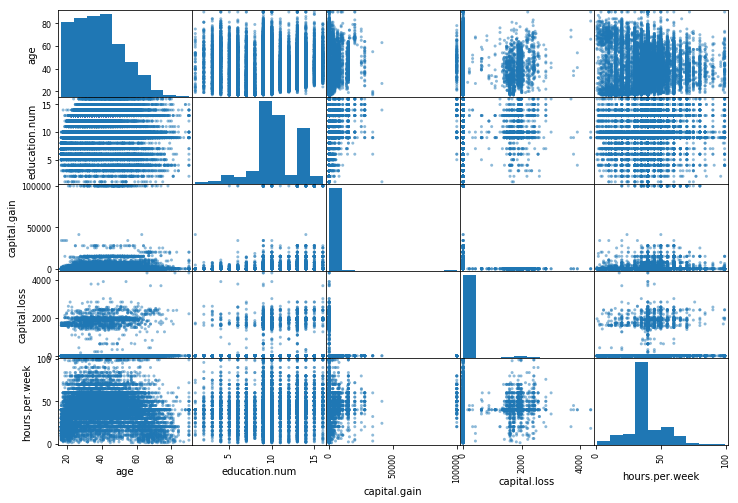

In [18]:
scatter_matrix(df[num],figsize=(12,8))

# EDA-Report: The DataFrame requires Feature Scaling

In [19]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [20]:
d={'<=50K':False,'>50K':True}

In [21]:
df.income=df.income.map(d)

In [22]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


In [23]:
num=["age","education.num","capital.gain","capital.loss","hours.per.week"]

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
df[num]=scaler.fit_transform(df[num])

In [27]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [28]:
df=df.drop(columns=['workclass','fnlwgt','education','marital.status','occupation','relationship', 'race','sex','native.country'])

# Classification Models

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(df[num],df.income,test_size=0.3,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression()

In [33]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
df.income.value_counts()

False    24720
True      7841
Name: income, dtype: int64

In [35]:
df.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,False
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,False
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,False
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,False
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,False


In [37]:
y_pred=lr.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.8164602313440475

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
G=GaussianNB()

In [43]:
G.fit(X_train,y_train)

GaussianNB(priors=None)

In [44]:
y_predg=G.predict(X_test)

In [45]:
accuracy_score(y_test,y_predg)

0.8000818916982291

In [46]:
from sklearn.svm import SVC

In [48]:
svc=SVC(kernel='rbf')

In [49]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
y_preds=svc.predict(X_test)

In [51]:
accuracy_score(y_test,y_preds)

0.8277203398505476

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dtc=DecisionTreeClassifier()

In [54]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
y_predd=dtc.predict(X_test)

In [56]:
accuracy_score(y_test,y_predd)

0.8115467294503019

In [57]:
from sklearn.ensemble import VotingClassifier

In [60]:
estimators=[]
estimators.append(('logistic',lr))
estimators.append(('cart',dtc))
estimators.append(('svm',svc))

In [63]:
ensem=VotingClassifier(estimators)

In [64]:
ensem.fit(X_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('cart',...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [65]:
y_prede=ensem.predict(X_test)

/home/harsh/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [66]:
accuracy_score(y_test,y_prede)

0.8286416214556249

# Ensemble Methods makes best prediction